## Market Basket Analysis

#### Import Libraries

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read all CSV files 

In [15]:
order_products_train_df = pd.read_csv("./input/order_products__train.csv")
order_products_prior_df = pd.read_csv("./input/order_products__prior.csv")
orders_df = pd.read_csv("./input/orders.csv")
products_df = pd.read_csv("./input/products.csv")
aisles_df = pd.read_csv("./input/aisles.csv")
departments_df = pd.read_csv("./input/departments.csv")

In [16]:
# order_products__prior.csv contains previous order contents for all customers
# 'reordered' indicates that the customer has a previous order that contains the product.

print("Shape of order_products_prior: ",order_products_prior_df.shape)
order_products_prior_df.head(5)

Shape of order_products_prior:  (32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [17]:
print("Shape of order_products_train: ",order_products_train_df.shape)
order_products_train_df.head(5)

Shape of order_products_train:  (1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [18]:
# order_dow - day of the week
print("Shape of orders_df: ",orders_df.shape)
orders_df.head(5)

Shape of orders_df:  (3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


##### Order Summary: 

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64


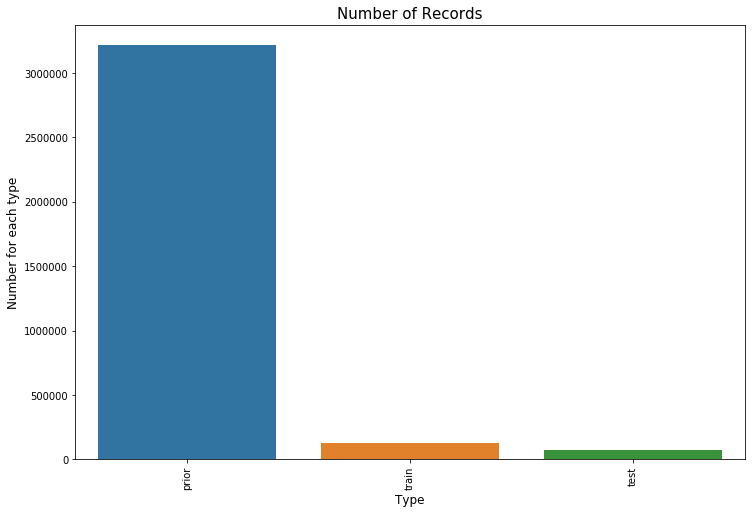

In [19]:
# There is column 'eval_set' which has a different category and we find the value_counts of each category
orders_df_type = orders_df.eval_set.value_counts()
print(orders_df_type)

plt.figure(figsize=(12,8))
sns.barplot(orders_df_type.index, orders_df_type.values)
plt.ylabel('Number for each type', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.title('Number of Records', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

##### Number of Unique customers

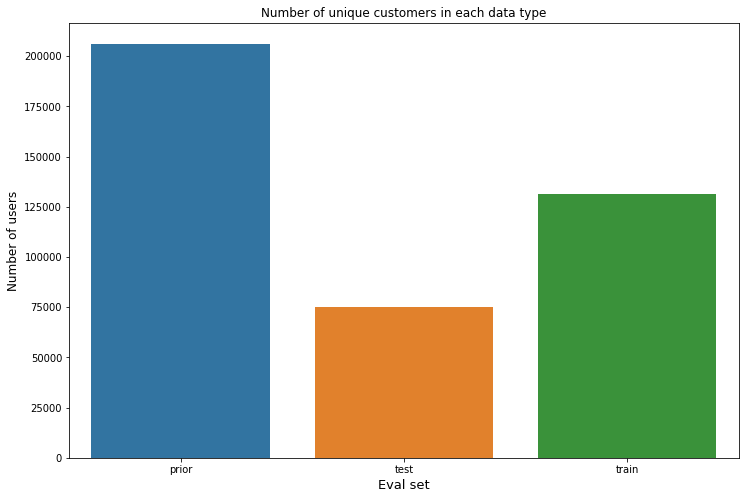

In [20]:
customers = orders_df.groupby("eval_set")["user_id"].apply(lambda x: len(x.unique()))

plt.figure(figsize=(12,8))
sns.barplot(customers.index, customers.values)
plt.ylabel('Number of users', fontsize=12)
plt.xlabel('Eval set', fontsize=13)
plt.title("Number of unique customers in each data type")
plt.show()

In [21]:
print("Number of Unique Customers")
print(customers)

Number of Unique Customers
eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64


In [22]:
print("Shape of products_df: ",products_df.shape)
products_df.head(5)

Shape of products_df:  (49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [23]:
print("Shape of aisles_df: ",aisles_df.shape)
aisles_df.head(5)

Shape of aisles_df:  (134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [24]:
print("Shape of departments_df: ",departments_df.shape)
departments_df.head(5)

Shape of departments_df:  (21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


##### Number of Orders on each day of the week

In [25]:
orders_df['order_dow'].value_counts()

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

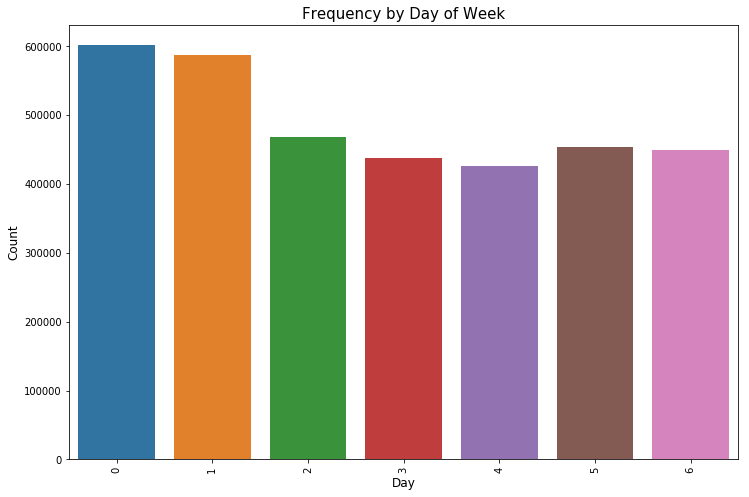

In [26]:
### Number of Orders on each day of the week

plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency by Day of Week", fontsize=15)
plt.show()

Day of week with maximum orders:

We can see the orders were the highest during the weekend.
It again picks up during the end of the week, and Wednesday being the lowest.


##### Time of Orders in the day

We use orders_df which as the data for 'order_hour_of_day' to verify this


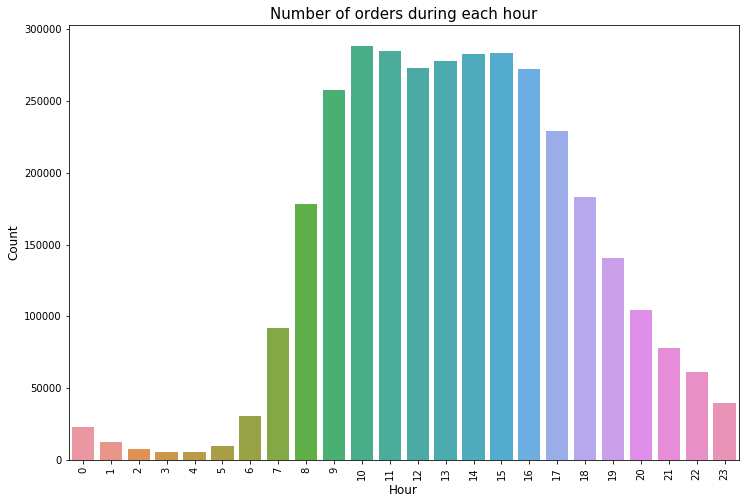

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Number of orders during each hour", fontsize=15)
plt.show()


##### Days since prior order:  

People re-order after a week or in one month again.

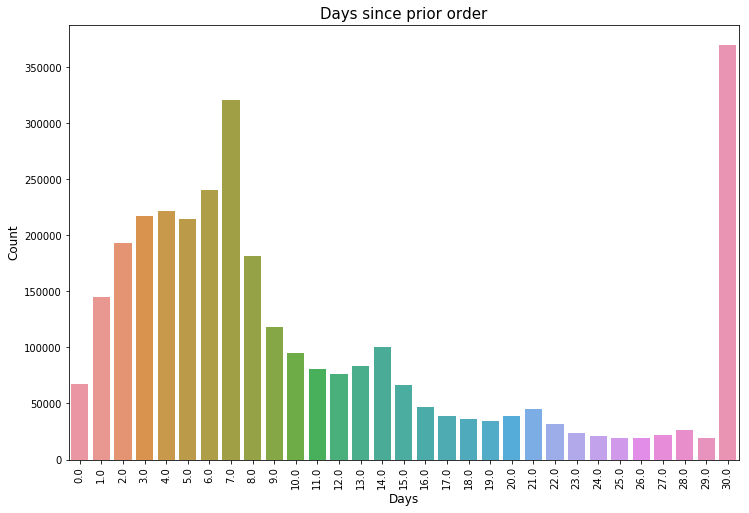

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Days since prior order", fontsize=15)
plt.show()

##### Number of orders by each customer

We know from the data description that for each user, there are between 4 and 100 of their orders, with the sequence of products purchased in each order. It would be useful to know the number of orders for each customer.

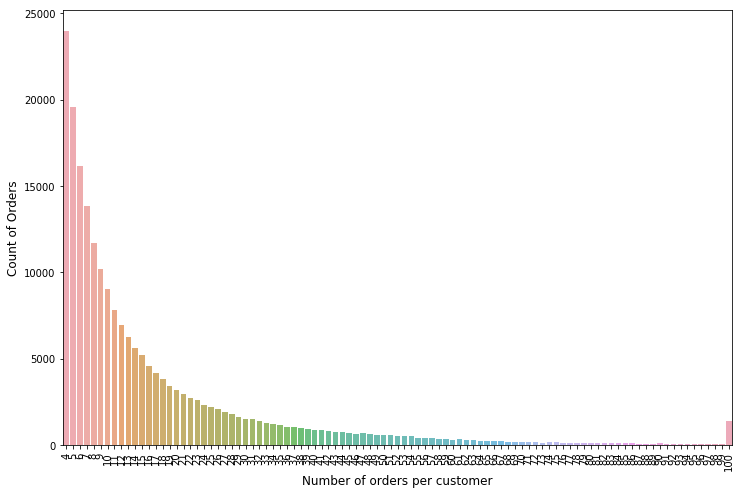

In [29]:
customer_orders = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
customer_orders = customer_orders.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(customer_orders.index,customer_orders.values, alpha=0.8)
plt.ylabel('Count of Orders', fontsize=12)
plt.xlabel('Number of orders per customer', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

##### Number of unique products in the orders

In [30]:
order_products_merged_df = pd.concat([order_products_train_df, order_products_prior_df], axis=0)
print("The order_products_merged size is : ", order_products_merged_df.shape)

# Number of unique orders and products
unique_orders = len(set(order_products_merged_df.order_id))
unique_products = len(set(order_products_merged_df.product_id))

print("There are %s orders for %s products" %(unique_orders, unique_products))

The order_products_merged size is :  (33819106, 4)
There are 3346083 orders for 49685 products


##### Analyzing the Top products ordered and aisles

In [31]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [32]:
products_ordered = order_products_prior_df['product_name'].value_counts().reset_index().head(10)
products_ordered.columns = ['product_name', 'frequency']
products_ordered

,product_name,frequency
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


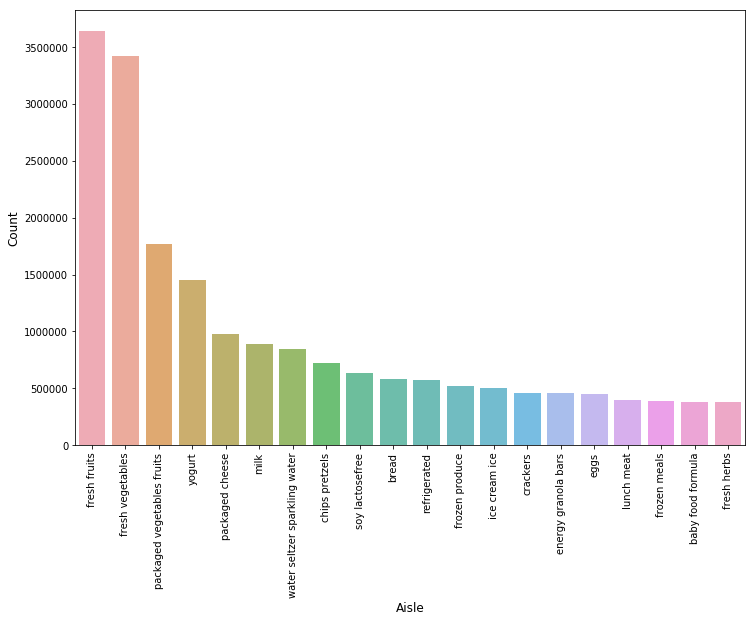

In [33]:
aisles = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(aisles.index, aisles.values, alpha=0.8)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

##### Popular Departments by the number of products

In [34]:
products_details = pd.merge(left=products_df,right=departments_df,how="left")
products_details = pd.merge(left=products_details,right=aisles_df,how="left")
products_details.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


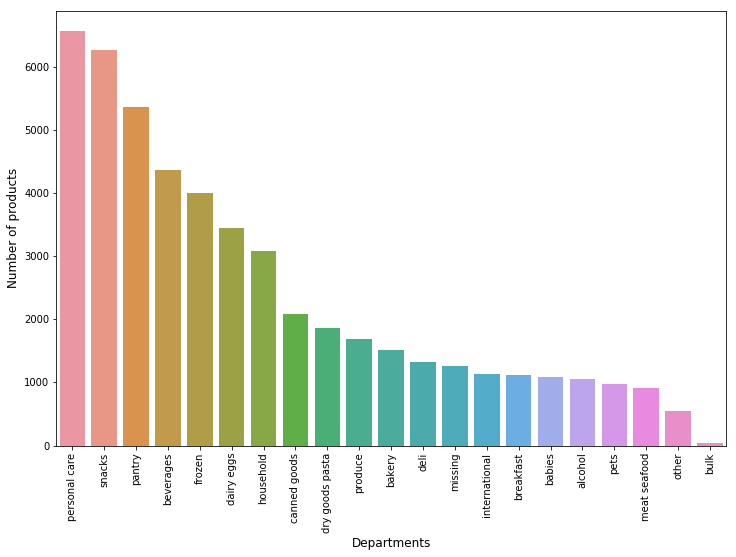

In [35]:
product_group = products_details.groupby("department")["product_id"].aggregate({'Total_products': 'count'}).reset_index()
product_group.sort_values(by='Total_products', ascending=False, inplace=True)
product_group  = product_group.groupby(['department']).sum()['Total_products'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='vertical')
sns.barplot(product_group.index, product_group.values)
plt.ylabel('Number of products', fontsize=12)
plt.xlabel('Departments', fontsize=12)
plt.show()

In [36]:
##### Important Aisles across Departments based on the number of products

In [37]:
aisle_group = products_details.groupby("aisle")["product_id"].aggregate({'Total_products': 'count'}).reset_index()
aisle_group = aisle_group.sort_values(by='Total_products', ascending=False)[:10]
aisle_group

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,aisle,Total_products
85,missing,1258
18,candy chocolate,1246
71,ice cream ice,1091
130,vitamins supplements,1038
133,yogurt,1026
25,chips pretzels,989
125,tea,894
93,packaged cheese,891
59,frozen meals,880
31,cookies cakes,874


In [38]:
aisle_group

,aisle,Total_products
85,missing,1258
18,candy chocolate,1246
71,ice cream ice,1091
130,vitamins supplements,1038
133,yogurt,1026
25,chips pretzels,989
125,tea,894
93,packaged cheese,891
59,frozen meals,880
31,cookies cakes,874


#### Combining all the products and orders purchased by customer

In [39]:
prod_order = pd.merge(orders_df, order_products_prior_df, on='order_id', how='inner')


In [40]:
prod_order.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household


##### Size or the (number of products) of each order.

- To check how many orders were included in each order.

In [41]:
ordersize = order_products_prior_df.groupby('order_id')[['add_to_cart_order']].max()
ordersize.columns= ['order_size']
ordersize.head(10)

,order_size
order_id,
2,9
3,8
4,13
5,26
6,3
7,2
8,1
9,15
10,15


##### Find the number of orders for each basket size

In [42]:
sizes_df = ordersize.groupby('order_size')[['order_size']].count()
sizes_df.columns = ['total_orders']
sizes_df.head(10)

,total_orders
order_size,
1,156748
2,186993
3,207027
4,222081
5,228330
6,227675
7,220006
8,203374
9,184347


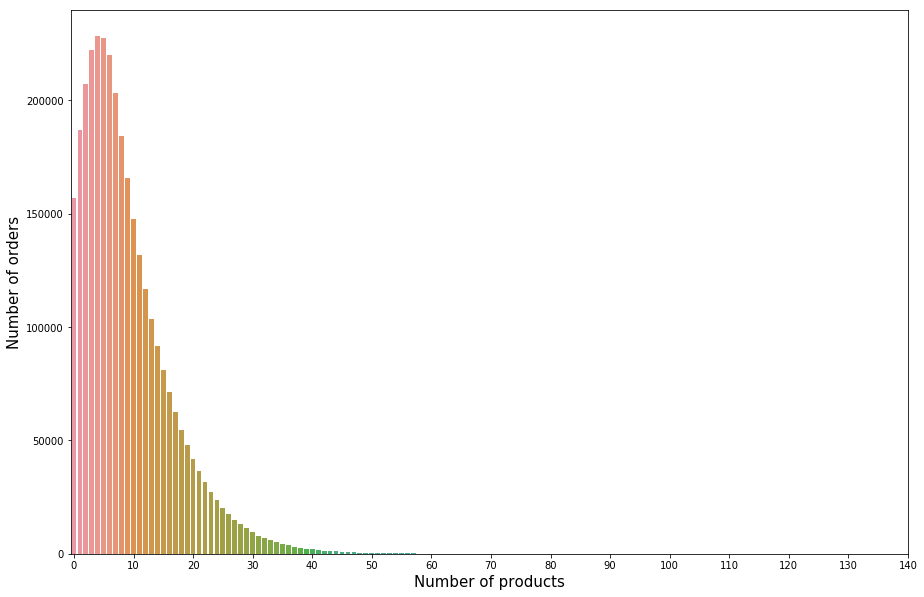

In [43]:
plt.figure(figsize=(15,10))
#size_of_order will be on our x-axis and total_orders the y-axis
graph = sns.barplot(sizes_df.index,sizes_df.total_orders)
# we modify the x-ticks
graph.set( xticks=list( range(0,sizes_df.index.max(),10) ), xticklabels=list( range(0,sizes_df.index.max(),10) ) )
plt.ylabel('Number of orders', fontsize=15)
plt.xlabel('Number of products', fontsize=15)
plt.show()

To find the size of the orders, we analyze - 
The number of products for each order (which will be the size of the order),Number of orders for each basket size. In the first table, order_id =  5 has 26 products in the cart. The plot shows the number of products for orders 


##### Reordering possibility

- Out of these products, it would be useful to know which products have the possibility to be reodered.
- We have the column 'reordered = 0 or 1' in the order_products_prior table which could help us analyze this 
- We take mean of the product being reordered by the total order for a product_id.


In [44]:
prod_reorder = order_products_prior_df.groupby('product_id').filter(lambda x: x.product_id.count() >40)
prod_reorder.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [45]:
prod_reorder = prod_reorder.groupby('product_id')[['reordered']].mean()
prod_reorder.columns = ['reorder_ratio']
prod_reorder.head()

,reorder_ratio
product_id,
1,0.613391
2,0.133333
3,0.732852
4,0.446809
8,0.503030


In [46]:
prod_reorder = prod_reorder.sort_values(by='reorder_ratio', ascending=False)
top_reorders = prod_reorder.iloc[0:10]
top_reorders.head(10)

,reorder_ratio
product_id,
6433,0.941176
2075,0.931034
27740,0.920792
13875,0.911111
31418,0.900000
35604,0.900000
36543,0.895522
26093,0.893939
38251,0.891892


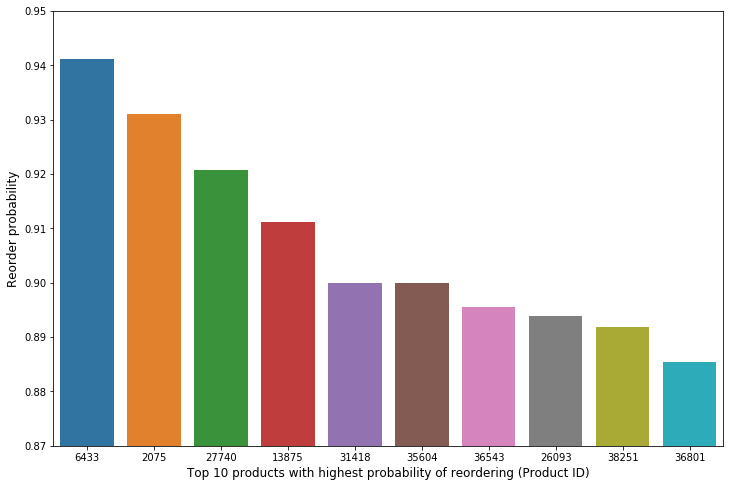

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(top_reorders.index, top_reorders.reorder_ratio, order=top_reorders.index)
plt.xlabel('Top 10 products with highest probability of reordering (Product ID)', size=12)
plt.ylabel('Reorder probability', size=12)
plt.ylim(0.87,0.95)
plt.show()

In [48]:
## Getting the product_name using Product ID
products_df[products_df.product_id == 6433]

,product_id,product_name,aisle_id,department_id
6432,6433,Raw Veggie Wrappers,13,20


##### Distribution for reorder probability of all products.

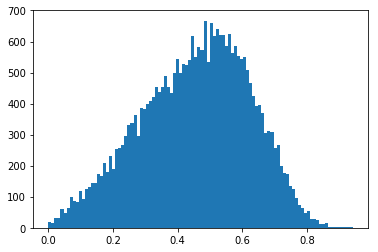

In [49]:
plt.hist(prod_reorder.reorder_ratio, bins=100)
plt.show()

#### Feature Creation using user ID and order_products_prior data

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import metrics, model_selection

In [2]:
data_path = "./input/"
orders_df = pd.read_csv(data_path + "orders.csv", usecols=["order_id","user_id","order_number"])

In [3]:
# read the prior order file #
prior_df = pd.read_csv(data_path + "order_products__prior.csv")

# merge with the orders file to get the user_id 
prior_df = pd.merge(prior_df, orders_df, how="inner", on="order_id")

# get the products and reorder status of the latest purchase of each user 
prior_grouped_df = prior_df.groupby("user_id")["order_number"].aggregate("max").reset_index()
prior_df_latest = pd.merge(prior_df, prior_grouped_df, how="inner", on=["user_id", "order_number"])
prior_df_latest = prior_df_latest[["user_id", "product_id", "reordered"]]
prior_df_latest.columns = ["user_id", "product_id", "reordered_latest"]

# get the count of each product and number of reorders by the customer 
prior_df = prior_df.groupby(["user_id","product_id"])["reordered"].aggregate(["count", "sum"]).reset_index()
prior_df.columns = ["user_id", "product_id", "reordered_count", "reordered_sum"]

# merge the prior df with latest df
prior_df = pd.merge(prior_df, prior_df_latest, how="left", on=["user_id","product_id"])
prior_df.head()


,user_id,product_id,reordered_count,reordered_sum,reordered_latest
0,1,196,10,9,1.0
1,1,10258,9,8,1.0
2,1,10326,1,0,NaN
3,1,12427,10,9,1.0
4,1,13032,3,2,1.0


##### Train and Test dataset creation and merging orders data to get the user_id for order_id

In [4]:
orders_df.drop(["order_number"],axis=1,inplace=True)

train_df = pd.read_csv(data_path + "order_products__train.csv", usecols=["order_id"])
train_df = train_df.groupby("order_id").aggregate("count").reset_index()
test_df = pd.read_csv(data_path + "sample_submission.csv", usecols=["order_id"])
train_df = pd.merge(train_df, orders_df, how="inner", on="order_id")
test_df = pd.merge(test_df, orders_df, how="inner", on="order_id")
print(train_df.shape, test_df.shape)

(131209, 2) (75000, 2)


##### Merging the train and test data with prior_df to get the products purchased previously by the customer.

In [5]:
train_df = pd.merge(train_df, prior_df, how="inner", on="user_id")
test_df = pd.merge(test_df, prior_df, how="inner", on="user_id")
del prior_df, prior_grouped_df, prior_df_latest
print(train_df.shape, test_df.shape)

(8474661, 6) (4833292, 6)


#####  From "products.csv" we can get the product and isle information.
- So merging the train and test data with product information.

In [6]:
products_df = pd.read_csv(data_path + "products.csv", usecols=["product_id", "aisle_id", "department_id"])
train_df = pd.merge(train_df, products_df, how="inner", on="product_id")
test_df = pd.merge(test_df, products_df, how="inner", on="product_id")
del products_df
print(train_df.shape, test_df.shape)

(8474661, 8) (4833292, 8)


##### Using the training data to populate the target variable (which is product reordering)

In [7]:
train_y_df = pd.read_csv(data_path + "order_products__train.csv", usecols=["order_id", "product_id", "reordered"])
train_y_df = pd.merge(train_y_df, orders_df, how="inner", on="order_id")
train_y_df = train_y_df[["user_id", "product_id", "reordered"]]

train_df = pd.merge(train_df, train_y_df, how="left", on=["user_id", "product_id"])
train_df["reordered"].fillna(0, inplace=True)
print(train_df.shape)
del train_y_df

(8474661, 9)


##### Target Variable for train set

In [8]:
# Target Variable
train_y = train_df.reordered.values

# Test predictions dataframe
out_df = test_df[["order_id", "product_id"]]

# Dropping unwanted columns
train_df = np.array(train_df.drop(["order_id", "user_id", "reordered"], axis=1))
test_df = np.array(test_df.drop(["order_id", "user_id"], axis=1))
print(train_df.shape, test_df.shape)

(8474661, 6) (4833292, 6)


##### XGBoost Model and Parameter Definition

In [10]:
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=0):
        params = {}
        params["objective"] = "binary:logistic"
        params['eval_metric'] = 'logloss'
        params["eta"] = 0.05
        params["subsample"] = 0.7
        params["min_child_weight"] = 10
        params["colsample_bytree"] = 0.7
        params["max_depth"] = 8
        params["silent"] = 1
        params["seed"] = seed_val
        num_rounds = 100
        param_list = list(params.items())
        xgtrain = xgb.DMatrix(train_X, label=train_y)

        if test_y is not None:
                xgtest = xgb.DMatrix(test_X, label=test_y)
                watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
                model = xgb.train(param_list, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=10)
        else:
                xgtest = xgb.DMatrix(test_X)
                model = xgb.train(param_list, xgtrain, num_rounds)

        pred_test_y = model.predict(xgtest)
        return pred_test_y

##### Running the XGBoost Model

In [11]:
# run the xgboost model
pred = runXGB(train_df, train_y, test_df)
del train_df, test_df

# Threshold to get the prediction
cutoff = 0.2
pred[pred>=cutoff] = 1
pred[pred<cutoff] = 0
out_df["Pred"] = pred
out_df = out_df.ix[out_df["Pred"].astype('int')==1]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [12]:
# Merging into a single string if there are more than one product
def merge_prod(x):
    return " ".join(list(x.astype('str')))
out_df = out_df.groupby("order_id")["product_id"].aggregate(merge_prod).reset_index()
out_df.columns = ["order_id", "products"]

In [13]:
# Using the sample file to read and write the prediction
final_preds = pd.read_csv(data_path + "sample_submission.csv", usecols=["order_id"])
final_preds = pd.merge(final_preds, out_df, how="left", on="order_id")

# Filling None if there is no prediction
final_preds["products"].fillna("None", inplace=True)
final_preds.to_csv("Model_Predictions.csv", index=False)